# Implement Regression using Neural Network
**What we're going to do!**
- Architechture of a neural network regression model
- Input shapes and output shapes of a regression model (features and label)
- creating custom data to view and fit
- Steps in modelling
  - Creating a model,
  - Compliing a model,
  - fitting a model,
  - evaluating a model
- Different evaluation methods
- Saving and loading models

***Anatomy of a Neural Network***

---
Hyperparameters  
- **Input Layer Shape**: Same shape as number of features (e.g in housing price prediction shape = [3] for # bathrooms, # bedrooms, # car spaces).
- **Hidden layer(s)**: Problem specific, minimum = 1, maximum = unlimited
- **Neurons per hidden layer**: problem specific, generally 10 to 100
- **Output layer shape**: Same shape as desired prediction shape (e.g 1 for house price)
- **Hidden activation function**: Usually ReLU (Recitified linear unit)
- **Output activation function**: None, ReLU, logit/tanh
- **Loss function**: MSE(Mean Squared Error) or MAE (mean absoulute error)/Huber (combination of MAE/MSE) if outliers
- **Optimizer**: SGD (Stochastic Gradient descent), ADAM.




In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd


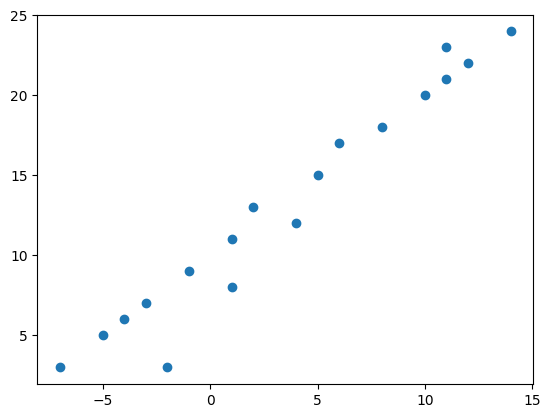

In [14]:
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -5.0, -4.0, -3.0, 1.0 ,-1.0,-2.0, 1.0, 4.0, 2.0, 5.0, 6.0, 8.0, 11.0,12.0,10.0,11.0,14.0])

# Create labels
y = np.array([3.0, 5.0, 6.0,7.0,8.0, 9.0, 3.0, 11.0, 12.0, 13.0, 15.0, 17.0, 18.0, 21.0,22.0, 20.0,23.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [16]:
X.shape, y.shape

((18,), (18,))

**Input and Output Shapes**

In [17]:
X_input = tf.constant(X)
y_output = tf.constant(y)

X_input, y_output

(<tf.Tensor: shape=(18,), dtype=float64, numpy=
 array([-7., -5., -4., -3.,  1., -1., -2.,  1.,  4.,  2.,  5.,  6.,  8.,
        11., 12., 10., 11., 14.])>,
 <tf.Tensor: shape=(18,), dtype=float64, numpy=
 array([ 3.,  5.,  6.,  7.,  8.,  9.,  3., 11., 12., 13., 15., 17., 18.,
        21., 22., 20., 23., 24.])>)

**Steps in Modelling with Tensorflow**
- Creating a model
- Compiling a model
- Fitting a model

- Another way to create a model:
`
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(1))
`

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. complie the model
model.compile(loss=tf.keras.losses.mae, # mean abosolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=['mae']
              )
model.fit(tf.expand_dims(X_input, axis=-1),y_output, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - loss: 18.7266 - mae: 18.7266
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 18.4870 - mae: 18.4870
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 18.2473 - mae: 18.2473
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 18.0077 - mae: 18.0077
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 17.7680 - mae: 17.7680


*Fit the model to the training data so it can discover patterns.*
- Epochs: how many times the model will go through all of the training examples.

In [34]:
# predict on a new data
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[-18.534998]], dtype=float32)

*Our basic model didn't learn well to from the given data*

**Imporving the model**
- Adding layers
- Increase the number of hidden units.
- change the activation fucntion
- change the optimization function
- change the learning rate
- fitting more data
- fitting for longer (more epochs)

*This is something we called hyperparameter tuning*

In [35]:
# let's rebuild the model -  Improve:p1

# 1. create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. complie the model
model.compile(loss=tf.keras.losses.mae, # mean abosolute error
              optimizer=tf.keras.optimizers.SGD(), # stochastic gradient descent
              metrics=['mae']
              )
model.fit(tf.expand_dims(X_input, axis=-1),y_output, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - loss: 17.2474 - mae: 17.2474
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 17.0181 - mae: 17.0181
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 16.8272 - mae: 16.8272
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 16.6363 - mae: 16.6363
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 16.4454 - mae: 16.4454
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 16.2545 - mae: 16.2545
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 16.0636 - mae: 16.0636
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.8727 - mae: 15.8727
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.6818 - mae: 15.6818
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.4909 - mae: 15.4909
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.3000 - mae: 15.3000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 15.1091 - mae: 15.1091
Epoch 13/100
1/1 ━━━━━━━

In [36]:
# predict on a new data
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[31.930532]], dtype=float32)

In [43]:
# let's rebuild the model -  Improve:p2

# 1. create a model using sequential API
model_p2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'), # adding an extra hidden layer with 100 hidden unit with 'relu' activation function.
    tf.keras.layers.Dense(1)
])

# 2. complie the model
model_p2.compile(loss=tf.keras.losses.mae, # mean abosolute error
              optimizer=tf.keras.optimizers.Adam(), # Adam optimizer
              metrics=['mae']
              )
model_p2.fit(tf.expand_dims(X_input, axis=-1),y_output, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.0869 - mae: 13.0869
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.0032 - mae: 13.0032
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.9194 - mae: 12.9194
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.8357 - mae: 12.8357
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.7520 - mae: 12.7520
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 12.6685 - mae: 12.6685
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 12.5852 - mae: 12.5852
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.5022 - mae: 12.5022
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.4189 - mae: 12.4189
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 12.3354 - mae: 12.3354
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.2521 - mae: 12.2521
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.1688 - mae: 12.1688
Epoch 13/100
1/1 ━━━━━━━━━━

In [44]:
# predict on a new data
y_pred = model_p2.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[26.000896]], dtype=float32)

**Build an another model with some more data**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

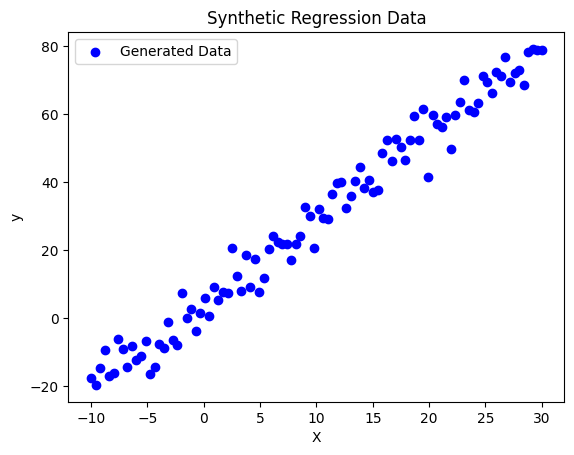

In [25]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate 100 evenly spaced X values
X_new = np.linspace(-10, 30, 100)
# Define a true linear relationship: y = 2.5x + 5 + noise
# Add Gaussian noise for scatter
noise = np.random.normal(0, 5, X_new.shape)
y_new = 2.5 * X_new + 5 + noise

# Plot to visualize
plt.scatter(X_new, y_new, color='blue', label='Generated Data')
plt.title("Synthetic Regression Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [15]:
X_new = tf.constant(X_new)
y_new = tf.constant(y_new)
X_new.shape, y_new.sh

(TensorShape([100]), TensorShape([100]))

**Preparing data for model training and testing is a crucial part of all machine learning paradigm**
- One of the most common and important step to produce your training and testing set (and sometime required your validation set)
- *Training set* : The data which is used to train a model. The model usually learn from this data, which is typically 70-80% of the total data.
- *Validation Set* : The model get tuned on this data, which is typically 10-15% of the total avialable data.
- *Test set* : The model gets evaluated on this data to test what it has learned, again 10-15% of the total data available.

In [16]:
# Let's prepare the data for training and testing
len(X_new)

100

In [17]:
# split the data into train and test sets
X_train_new = X_new[:80]
X_test_new = X_new[80:]

y_train_new = y_new[:80]
y_test_new = y_new[80:]

In [18]:
len(X_train_new), len(y_train_new)

(80, 80)

In [20]:
X_test_new.shape, y_test_new.shape

(TensorShape([20]), TensorShape([20]))

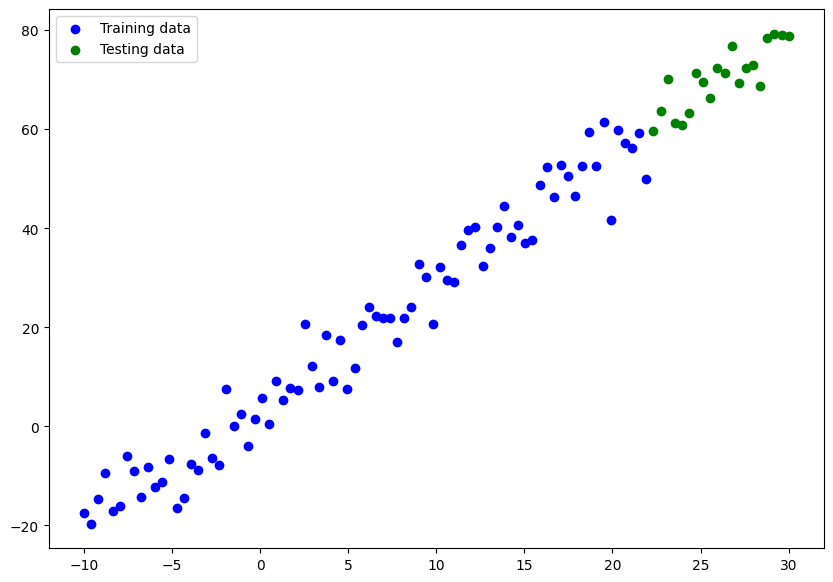

In [22]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train_new, y_train_new, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test_new, y_test_new, c='g', label='Testing data')
# Show the legend
plt.legend()
plt.show()

In [33]:
from os import name
# create a model to train and test on new synthetic data
tf.random.set_seed(42)
# 1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu', input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model-1')
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

Calling summary() on the model shows us the layers it contains, the output shape and the number of parameters
- Total params: total number of parameters in the model
- Trainable parameters: these are the parameters (patterns) the model can update as it trains.
- Non-trainable parameters : these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning)

In [35]:
model.fit(X_train_new,y_train_new,epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 23.0422 - mae: 23.0422
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 21.7641 - mae: 21.7641
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 20.5029 - mae: 20.5029
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 19.2363 - mae: 19.2363
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.9983 - mae: 17.9983
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.7391 - mae: 16.7391
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 15.4657 - mae: 15.4657
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 14.1821 - mae: 14.1821
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.8297 - mae: 12.8297 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.3921 - mae: 11.3921 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.8906 - mae: 9.8906
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.2897 - mae: 8.2897
Epoch 13/100
3/3 ━━━━━━━━━━

In [36]:
model.summary()

Model: "model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

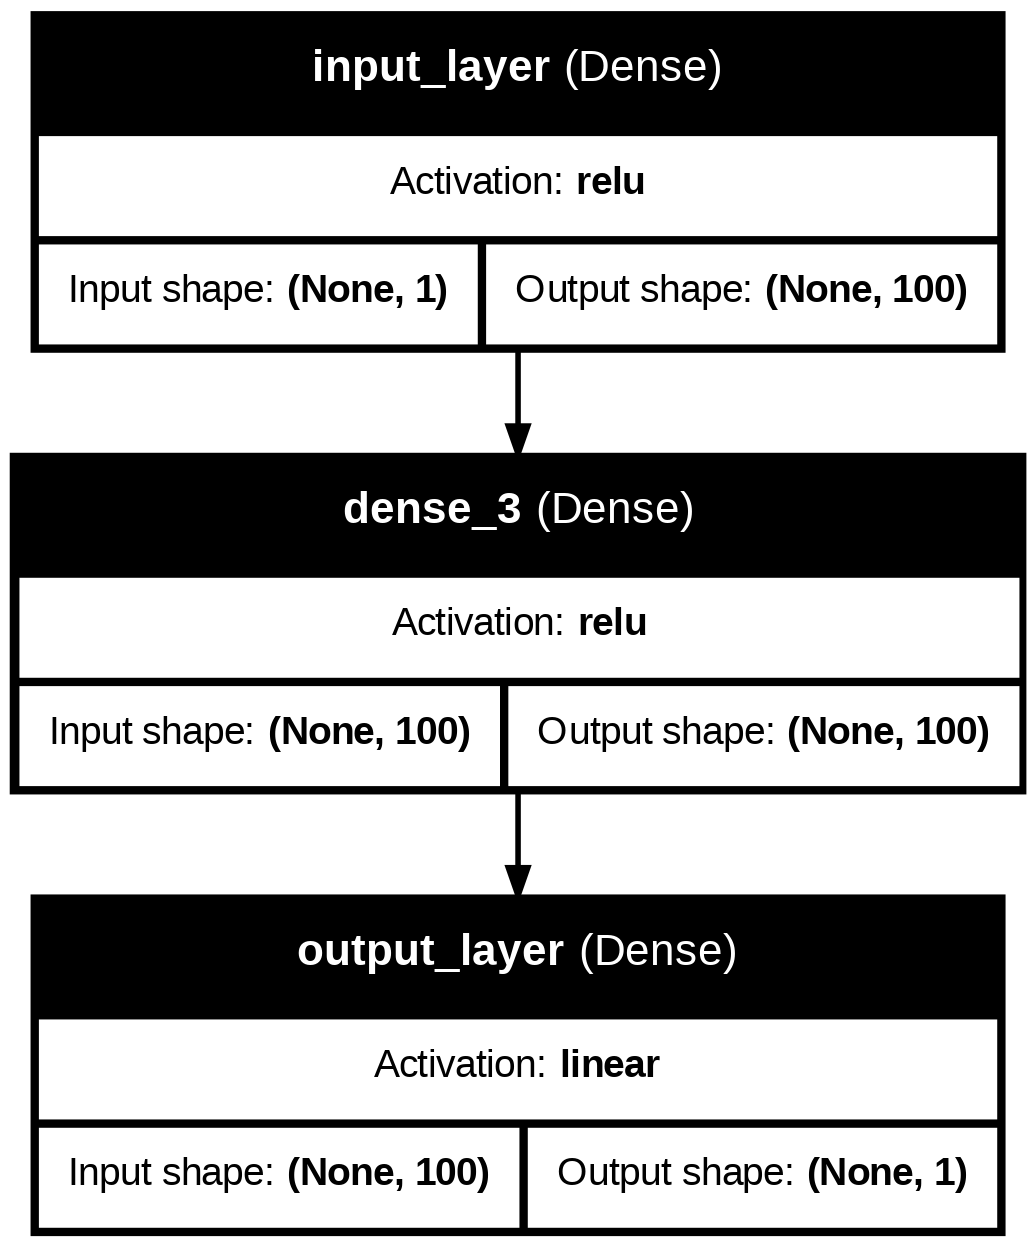

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [39]:
y_pred = model.predict(X_test_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[61.410503],
       [62.478977],
       [63.547455],
       [64.61592 ],
       [65.684395],
       [66.75288 ],
       [67.82135 ],
       [68.889824],
       [69.9583  ],
       [71.02677 ],
       [72.09524 ],
       [73.16372 ],
       [74.23219 ],
       [75.300674],
       [76.36914 ],
       [77.43762 ],
       [78.50609 ],
       [79.57456 ],
       [80.64304 ],
       [81.71151 ]], dtype=float32)

In [40]:
y_test_new

<tf.Tensor: shape=(20,), dtype=float64, numpy=
array([59.70972137, 63.60374468, 70.21775305, 61.24703275, 60.80601683,
       63.34980064, 71.44569746, 69.52254343, 66.24008787, 72.46532706,
       71.39447866, 76.76241687, 69.41902746, 72.30108321, 72.98895418,
       68.64202122, 78.45029836, 79.28507434, 79.01546627, 78.82706433])>

In [43]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

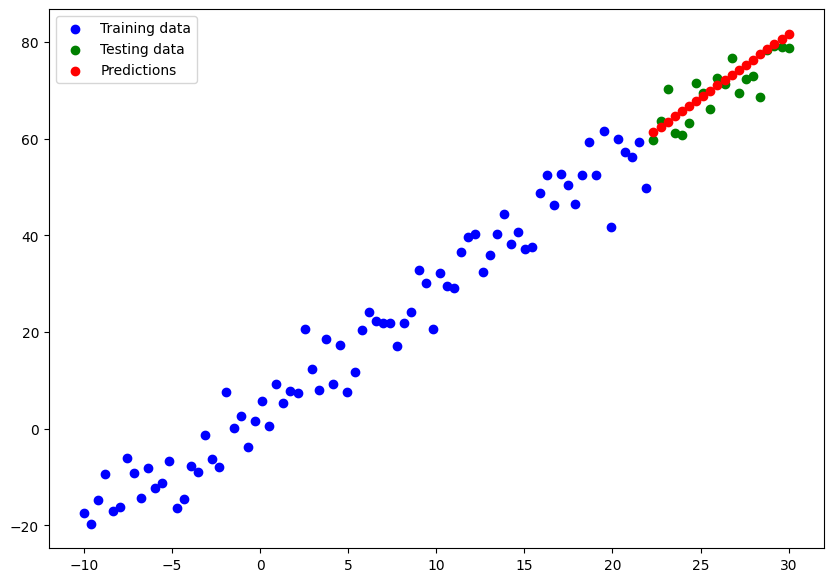

In [44]:
plot_predictions(X_train_new,y_train_new,X_test_new,y_test_new,y_pred)

**Evaluate the model**
- We are using a evaluation metric to test the model performance
- General evaluation metrics used for regression problem:
  - MAE: mean absolute area : As a great starter metric for any regression problem.
  - MSE: mean squared area : When larger errors are more significant than smaller errors.
  - Huber : Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [46]:
# you get the error on training set
model.evaluate(X_test_new,y_test_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 2.9853 - mae: 2.9853


[2.9852659702301025, 2.9852659702301025]

In [48]:
y_pred.shape, y_test_new.shape

((20, 1), TensorShape([20]))

In [59]:
mae_loss = tf.metrics.mae(y_true=y_test_new, y_pred=tf.squeeze(y_pred))
mae_loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.9852659702301025>

**Save the model**

There are ways to save a tensorflow model:
- The savedModel Format (default)
  - Save the entire model as a `.keras` zip archive.
- The HDF5 format.
  - Save the entire model to a HDF5 file. The `.h5` extension indicates that the model should be saved to HDF5.

In [61]:
# saved a model using SavedModel
model.save("best_model_SavedModel_format.keras") # Save the entire model as a `.keras` zip archive.

**Load the model**

In [62]:
# load the SavedModel
my_model = tf.keras.models.load_model('best_model_SavedModel_format.keras')

In [63]:
my_model.summary()

Model: "model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,205 (121.90 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,804 (81.27 KB)

Download a file from the Google Colab
- Directly right click on the file and download OR
- You can use the below code.

In [64]:
from google.colab import files
files.download('/content/best_model_SavedModel_format.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>